In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt 
from PIL import Image
%matplotlib inline


In [67]:

danwi = pd.read_csv('./5_danwi.csv')
bangmun = pd.read_csv('./5_bangmun.csv')

In [68]:
danwi.head(10)

,gubun,HID,PID,type1,type2,month,M_ID,q1,q2_a,q2_a_1,...,q10_4,q10_5,q10_6,q10_7,q10_8,q10_9,q10_10,q10_11,q10_12,wt
0,1.0,10001,1000101,4,1.0,1.0,101371.0,2.0,2017.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6201.607951
1,1.0,10001,1000101,1,2.0,7.0,101372.0,2.0,2017.0,7.0,...,4.0,4.0,9.0,4.0,4.0,4.0,4.0,4.0,4.0,6201.607951
2,2.0,10001,1000101,1,2.0,8.0,115439.0,2.0,2017.0,8.0,...,4.0,4.0,9.0,4.0,4.0,4.0,4.0,4.0,4.0,6201.607951
3,1.0,10001,1000101,4,2.0,10.0,115436.0,1.0,2017.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6201.607951
4,1.0,10001,1000101,1,2.0,10.0,115437.0,1.0,2017.0,10.0,...,9.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6201.607951
5,2.0,10001,1000101,4,2.0,10.0,115440.0,1.0,2017.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6201.607951
6,1.0,10001,1000102,4,1.0,1.0,101371.0,2.0,2017.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5886.547371
7,2.0,10001,1000102,4,1.0,4.0,101378.0,1.0,2017.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5886.547371
8,1.0,10001,1000102,1,2.0,7.0,101372.0,2.0,2017.0,7.0,...,4.0,4.0,9.0,4.0,4.0,4.0,4.0,4.0,4.0,5886.547371
9,1.0,10001,1000102,1,2.0,8.0,101365.0,1.0,2017.0,8.0,...,9.0,4.0,9.0,4.0,4.0,4.0,4.0,3.0,3.0,5886.547371


In [14]:
bangmun.head()

,HID,PID,type1,type2,month,M_ID,q6_1,q6_1_1,q6_1_2,q6_1_3,...,q6_6_17,q6_6_18,q6_6_19,q6_6_20,q6_6_21,q6_7,q6_8,q6_9,q7_2,wt
0,10001,1000101,1,2.0,8.0,115439.0,931.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,100000.0,6201.607951
1,10001,1000101,4,2.0,10.0,115440.0,931.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,6201.607951
2,10001,1000101,4,1.0,1.0,101371.0,911.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,6201.607951
3,10001,1000101,4,2.0,10.0,115436.0,911.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125000.0,6201.607951
4,10001,1000101,1,2.0,7.0,101372.0,932.0,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,650000.0,6201.607951


## data_overview 함수 

In [4]:
def data_overview(data) : 
    print("rows :",data.shape[0])
    print("Features : ", data.columns.tolist())
    print("\n     The number of features : ", len(data.columns.tolist()))
    print("\nMissing values : \n", data.isnull().sum())
    print("\nUniquel values : \n", data.nunique())

## 2. Data Manipulation

In [26]:
# type1 이 국내여행인 경우만 뺌 
danwi = danwi.loc[danwi['type1'] == 1,:]

bangmun = bangmun.loc[bangmun['type1']==1,:]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [1]:
# inner join == 틀린 방법
merge = pd.merge(danwi,bangmun).head()

NameError: name 'pd' is not defined

In [34]:
## outer merge도 틀린 방법
outer_merge = pd.merge(danwi,bangmun,how = 'outer')

### Merge(danwi, bangmun)
- 단위랑 방문을 ["PID" , "MID"] 기준으로 left merge 를 함
- 중복되는 column=> (_x) 컬럼명 변경 / (_y) 삭제
- type1도 삭제! 어차피 다 똑같음 

In [47]:
c

In [56]:
# gubun을 지웠었는데 가족여행자 ==> 동행에 쓰임 일단 지우지 말것

drop_col = ["HID_x","HID_y" ,"type1_x","type1_y","type2_y","wt_y","month_y"]

In [57]:
# column drop 
left_merge = left_merge.drop(drop_col,axis=1)

In [60]:
# column 명 변경
left_merge.rename(columns = {"type2_x":"type2","month_x":"month","wt_x":"wt"})

In [61]:
left_merge.head(20)

,PID,type2,month,M_ID,q1,q2_a,q2_a_1,q2_a_2,q2_b,q2_b_1,...,q6_6_16,q6_6_17,q6_6_18,q6_6_19,q6_6_20,q6_6_21,q6_7,q6_8,q6_9,q7_2
0,1000101,2.0,7.0,101372.0,2.0,2017.0,7.0,1.0,2017.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,650000.0
1,1000101,2.0,8.0,115439.0,2.0,2017.0,8.0,4.0,2017.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,100000.0
2,1000101,2.0,10.0,115437.0,1.0,2017.0,10.0,5.0,2017.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,60000.0
3,1000102,2.0,7.0,101372.0,2.0,2017.0,7.0,1.0,2017.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,650000.0
4,1000102,2.0,8.0,101365.0,1.0,2017.0,8.0,5.0,2017.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,120000.0
5,1000102,2.0,8.0,115434.0,1.0,2017.0,8.0,12.0,2017.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,100000.0
6,1000102,2.0,10.0,115437.0,1.0,2017.0,10.0,5.0,2017.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,60000.0
7,1000102,2.0,12.0,115441.0,1.0,2017.0,12.0,23.0,2017.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,100000.0
8,1000201,1.0,5.0,110564.0,1.0,2017.0,5.0,1.0,2017.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,20000.0
9,1000202,1.0,5.0,110564.0,1.0,2017.0,5.0,1.0,2017.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,20000.0


In [63]:
# csb 파일로 내보내기 
left_merge.to_csv("left_merge.csv",mode = "w")

In [62]:
data_overview(left_merge)

rows : 17705
Features :  ['PID', 'type2', 'month', 'M_ID', 'q1', 'q2_a', 'q2_a_1', 'q2_a_2', 'q2_b', 'q2_b_1', 'q2_b_2', 'q2_c_1', 'q2_c_2', 'q2_1_1', 'q2_1_2', 'q2_1_3', 'q2_1_4', 'q2_1_5', 'q3', 'q4_a', 'q4_b', 'q4_1_a', 'q4_1_b', 'q5', 'q5_1', 'q5_2_1', 'q5_2_2', 'q5_2_3', 'q5_2_4', 'q5_2_5', 'q5_2_6', 'q7', 'q7_1', 'q7_3_1', 'q7_3_2', 'q7_3_3', 'q7_3_4', 'q7_3_5', 'q7_3_6', 'q7_3_7', 'q7_3_8', 'q7_3_9', 'q7_3_10', 'q8', 'q8_1', 'q8_2', 'q8_3', 'q8_4', 'q8_5', 'q8_6', 'q8_7', 'q9', 'q9_1', 'q9_1_1', 'q9_1_2', 'q9_1_3', 'q9_1_4', 'q9_1_5', 'q9_2', 'q10_1', 'q10_2', 'q10_3', 'q10_4', 'q10_5', 'q10_6', 'q10_7', 'q10_8', 'q10_9', 'q10_10', 'q10_11', 'q10_12', 'wt', 'month_y', 'q6_1', 'q6_1_1', 'q6_1_2', 'q6_1_3', 'q6_1_4', 'q6_1_5', 'q6_1_6', 'q6_1_7', 'q6_1_8', 'q6_2', 'q6_3_a', 'q6_3_b', 'q6_3_c', 'q6_4', 'q6_5_1', 'q6_5_2', 'q6_5_3', 'q6_5_4', 'q6_5_5', 'q6_5_6', 'q6_5_7', 'q6_5_8', 'q6_5_9', 'q6_5_10', 'q6_5_11', 'q6_5_12', 'q6_5_13', 'q6_5_1a', 'q6_5_2a', 'q6_5_3a', 'q6_5_4a', 'q6_

### 2018-12-01 


#  age
- age_group
# price
- price_group

In [114]:
age = pd.read_csv('./age.csv')
price = pd.read_csv('./price.csv')

In [115]:
age = age[["PID","age"]]
age.head()

,PID,age
0,1000101.0,40.0
1,1000102.0,40.0
2,1000201.0,41.0
3,1000202.0,73.0
4,1000203.0,46.0


In [116]:
people = pd.merge(price,age, how="left",on = "PID")

In [55]:
people.shape

(17705, 3)

In [56]:
people.head()

,PID,price,age
0,1000101,92857,40.0
1,1000101,50000,40.0
2,1000101,60000,40.0
3,1000102,92857,40.0
4,1000102,120000,40.0


In [117]:
def age_distribution(data):
    data.loc[(data['age'] >= 15) & (data['age'] <= 19), 'age_group'] = 1
    data.loc[(data['age'] >= 20) & (data['age'] <= 29), 'age_group'] = 2
    data.loc[(data['age'] >= 30) & (data['age'] <= 45), 'age_group'] = 3
    data.loc[(data['age'] >= 46) & (data['age'] <= 59), 'age_group'] = 4
    data.loc[(data['age'] >= 60) & (data['age'] <= 79), 'age_group'] = 5
    data.loc[(data['age'] >= 80) & (data['age'] <= 100), 'age_group'] = 6
    data['age_group'].astype(int)
    return data

In [118]:
print(people["price"].max())

900000


In [217]:
people.head()

,PID,price,age,age_group,price_group
0,1000101,92857,40.0,3.0,2.0
1,1000101,50000,40.0,3.0,2.0
2,1000101,60000,40.0,3.0,2.0
3,1000102,92857,40.0,3.0,2.0
4,1000102,120000,40.0,3.0,2.0


In [120]:
data_overview(people)

rows : 17705
Features :  ['PID', 'price', 'age']

     The number of features :  3

Missing values : 
 PID      0
price    0
age      0
dtype: int64

Uniquel values : 
 PID      4601
price     716
age        81
dtype: int64


In [121]:
people["price"] = people["price"].astype(int)
people.head()

,PID,price,age
0,1000101,92857,40.0
1,1000101,50000,40.0
2,1000101,60000,40.0
3,1000102,92857,40.0
4,1000102,120000,40.0


In [6]:
def price_distribution(data):
    data.loc[(data['price'] >= 0) & (data['price'] <= 50000), 'price_group'] = 1
    data.loc[(data['price'] >= 50000) & (data['price'] <= 100000), 'price_group'] = 2
    data.loc[(data['price'] >= 100000), 'price_group'] = 3
    data['price_group'].astype(int)
    return data

In [226]:
people = age_distribution(people)

In [227]:
pg = price_distribution(people)

In [228]:
pg.head()

,PID,price,age,age_group,price_group
0,1000101,92857,40.0,3.0,2.0
1,1000101,50000,40.0,3.0,2.0
2,1000101,60000,40.0,3.0,2.0
3,1000102,92857,40.0,3.0,2.0
4,1000102,120000,40.0,3.0,3.0


In [126]:
people.to_csv("people.csv",mode = "w")

C:\Users\YOONHOI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\YOONHOI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\YOONHOI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, '나이와 일별여행지출비용과의 Joint Plot')

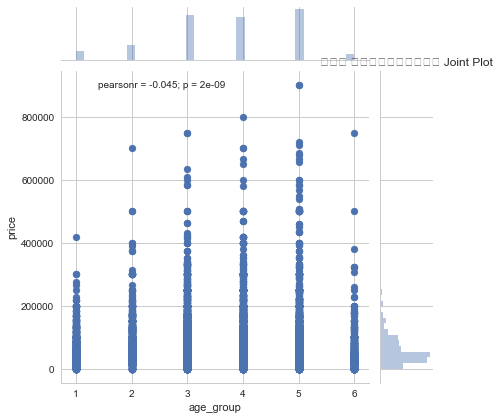

In [95]:
sns.jointplot(x = "age_group",y = "price", data = people,kind = 'scatter')
plt.title("나이와 일별여행지출비용과의 Joint Plot")

In [68]:
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

C:\Users\YOONHOI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\YOONHOI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\YOONHOI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, '나이와 일별여행지출비용과의 Joint Plot')

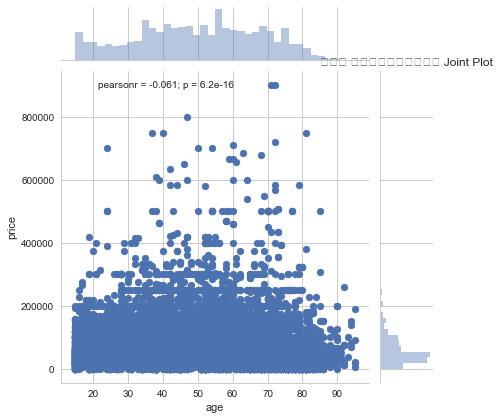

In [69]:
sns.jointplot(x = "age",y = "price", data = people,kind = 'scatter')
plt.title("나이와 일별여행지출비용과의 Joint Plot")

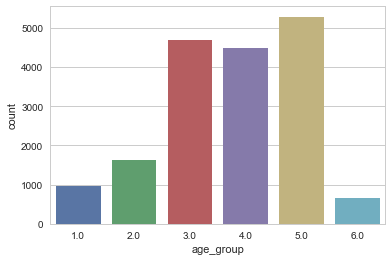

In [76]:
sns.countplot(x = 'age_group',data = people)

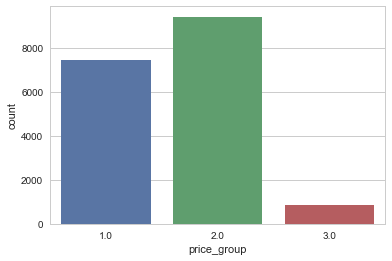

In [215]:
sns.countplot(x="price_group",data = people)

C:\Users\YOONHOI\Anaconda3\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\YOONHOI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


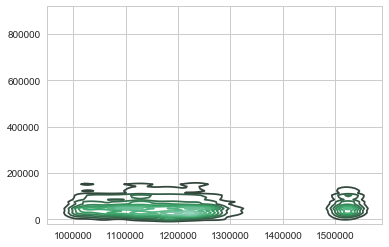

In [79]:
sns.kdeplot(price)

In [82]:
people["price"] = people["price"].astype(float)

In [103]:
satisfy = left_merge[["PID","q6_7"]]

satisfy.head()

,PID,q6_7
0,1000101,4
1,1000101,4
2,1000101,4
3,1000102,4
4,1000102,4


In [105]:
satisfy = satisfy.rename(columns = {"q6_7":"satisfy"})

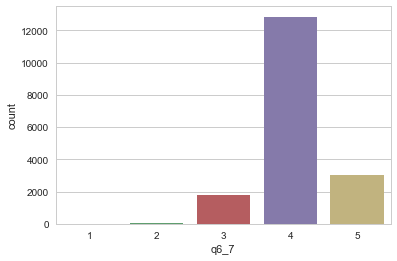

In [102]:
sns.countplot(x="satisfy",data = satisfy)

In [232]:
def satisfy_distribution(data):
    data.loc[(data['satisfy'] <=3), 'satisfy_group'] = 1
    data.loc[(data['satisfy'] == 4), 'satisfy_group'] = 2
    data.loc[(data['satisfy'] == 5), 'satisfy_group'] = 3
    data['satisfy_group'].astype(int)
    return data

In [240]:
satisfy_distribution(satisfy).head(20)

,PID,satisfy,satisfy_group
0,1000101,4,2.0
1,1000101,4,2.0
2,1000101,4,2.0
3,1000102,4,2.0
4,1000102,4,2.0
5,1000102,4,2.0
6,1000102,4,2.0
7,1000102,4,2.0
8,1000201,3,1.0
9,1000202,3,1.0


In [241]:
groups = pd.merge(pg,satisfy, how="left",on = "PID")

In [243]:
groups.head(50)

,PID,price,age,age_group,price_group,satisfy,satisfy_group
0,1000101,92857,40.0,3.0,2.0,4,2.0
1,1000101,92857,40.0,3.0,2.0,4,2.0
2,1000101,92857,40.0,3.0,2.0,4,2.0
3,1000101,50000,40.0,3.0,2.0,4,2.0
4,1000101,50000,40.0,3.0,2.0,4,2.0
5,1000101,50000,40.0,3.0,2.0,4,2.0
6,1000101,60000,40.0,3.0,2.0,4,2.0
7,1000101,60000,40.0,3.0,2.0,4,2.0
8,1000101,60000,40.0,3.0,2.0,4,2.0
9,1000102,92857,40.0,3.0,2.0,4,2.0


In [246]:
groups.to_csv("groups.csv",mode = "w")

In [223]:
data_overview(groups)

rows : 152849
Features :  ['PID', 'price', 'age', 'age_group', 'price_group', 'satisfy', 'satisfy_group']

     The number of features :  7

Missing values : 
 PID              0
price            0
age              0
age_group        0
price_group      0
satisfy          0
satisfy_group    0
dtype: int64

Uniquel values : 
 PID              4601
price             716
age                81
age_group           6
price_group         3
satisfy             5
satisfy_group       3
dtype: int64


In [196]:
place.head()

0    1000101.0
1    1000101.0
2    1000101.0
3    1000102.0
4    1000102.0
Name: PID, dtype: object

In [198]:
place = left_merge[["PID","q6_1","q6_1_1"]]
place.head()

# 데이터 프레임 으로 사실 90 090 으로 바꾸고 싶었는데 방법으 못찾아서 엑셀로 바꿈!

- 판다스 문자열 컬럼 두개 합치기
- [링크](https://code.i-harness.com/ko-kr/q/127af31)
- cat 함수 사용
- [stack overflow](https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string)
- [링크](https://code.i-harness.com/ko-kr/q/f27a5e)


In [ ]:
place['new'] = place.PID.str.cat(place.q6_1_1)

In [197]:
left_merge = pd.read_csv('./left_merge.csv')

In [155]:
def to_str(data):
    data.loc[(data['q6_1_1'] <=100), 'new'] = '0'+(data[['q6_1_1']])
    return data

In [200]:
place.to_csv("imsi.csv",mode = "w")

In [170]:
import numpy as np

In [207]:
place.head()

,PID,q6_1,q6_1_1
0,1000101.0,932.0,30.0
1,1000101.0,931.0,10.0
2,1000101.0,911.0,50.0
3,1000102.0,932.0,30.0
4,1000102.0,911.0,240.0


### 형 변환 하기 근데 뭔가 이상

In [216]:
place['q6_1_1'] = place[['q6_1_1']].astype(float)

ValueError: Cannot convert non-finite values (NA or inf) to integer

#### 엑셀로 바꾼 파일

In [203]:
imsi = pd.read_csv('./imsi.csv')
imsi.head()

,Unnamed: 0,PID,q6_1,q6_1_1,Unnamed: 4,new
0,0,1000101.0,932.0,30.0,30,932030
1,1,1000101.0,931.0,10.0,10,931010
2,2,1000101.0,911.0,50.0,50,911050
3,3,1000102.0,932.0,30.0,30,932030
4,4,1000102.0,911.0,240.0,240,911240


In [205]:
loc_code = imsi[["PID","new"]]
loc_code.head()

,PID,new
0,1000101.0,932030
1,1000101.0,931010
2,1000101.0,911050
3,1000102.0,932030
4,1000102.0,911240


In [209]:
loc_code[["PID"]] = loc_code[["PID"]].astype(str)
loc_code.head()

C:\Users\YOONHOI\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,PID,new
0,1000101.0,932030
1,1000101.0,931010
2,1000101.0,911050
3,1000102.0,932030
4,1000102.0,911240


2018-12-01-토

-데이터에서 널값이나  위치 q1제외

## 2018-12-02

In [2]:
left_merge = pd.read_csv('./left_merge.csv')

In [5]:
data_overview(left_merge)


rows : 17705
Features :  ['Unnamed: 0', 'PID', 'type2', 'month', 'M_ID', 'q1', 'q2_a', 'q2_a_1', 'q2_a_2', 'q2_b', 'q2_b_1', 'q2_b_2', 'q2_c_1', 'q2_c_2', 'q2_1_1', 'q2_1_2', 'q2_1_3', 'q2_1_4', 'q2_1_5', 'q3', 'q4_a', 'q4_b', 'q4_1_a', 'q4_1_b', 'q5', 'q5_1', 'q5_2_1', 'q5_2_2', 'q5_2_3', 'q5_2_4', 'q5_2_5', 'q5_2_6', 'c', 'q7_1', 'q7_3_1', 'q7_3_2', 'q7_3_3', 'q7_3_4', 'q7_3_5', 'q7_3_6', 'q7_3_7', 'q7_3_8', 'q7_3_9', 'q7_3_10', 'q8', 'q8_1', 'q8_2', 'q8_3', 'q8_4', 'q8_5', 'q8_6', 'q8_7', 'q9', 'q9_1', 'q9_1_1', 'q9_1_2', 'q9_1_3', 'q9_1_4', 'q9_1_5', 'q9_2', 'q10_1', 'q10_2', 'q10_3', 'q10_4', 'q10_5', 'q10_6', 'q10_7', 'q10_8', 'q10_9', 'q10_10', 'q10_11', 'q10_12', 'wt', 'q6_1', 'q6_1_1', 'q6_1_2', 'q6_1_3', 'q6_1_4', 'q6_1_5', 'q6_1_6', 'q6_1_7', 'q6_1_8', 'q6_2', 'q6_3_a', 'q6_3_b', 'q6_3_c', 'q6_4', 'q6_5_1', 'q6_5_2', 'q6_5_3', 'q6_5_4', 'q6_5_5', 'q6_5_6', 'q6_5_7', 'q6_5_8', 'q6_5_9', 'q6_5_10', 'q6_5_11', 'q6_5_12', 'q6_5_13', 'q6_5_1a', 'q6_5_2a', 'q6_5_3a', 'q6_5_4a', 'q

In [7]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LineanrRegression(fit_intercept = True)
model = model.fit()